# Plot maps of the UK (with data)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import re
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.family"] = "Cambria" # this sets the font type to use for any matplotlib graphs

# set file locations
# define folder location
folder = r"C:\Users\kelvi\Desktop"

# define map file locations
regions = "Regions_December_2024_Boundaries_EN_BFC_-8742955026742668245.zip"
msoa = "Middle_layer_Super_Output_Areas_December_2021_Boundaries_EW_BFC_V7_8984025090146420985.zip"
lsoa = "Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).zip"

# define data to plot
postcodes = "NSPL_FEB_2025_UK.csv"

# Load and join data

In [2]:
# load the postcode data and link to the regions data
df = pd.read_csv(f'{folder}/{postcodes}')

# select relevant columns
df = df[['pcd','lat','long']]

# make some data based on postcodes or load some data
df_post = pd.DataFrame({"place":["Waterloo","Piccadilly"],"postcode":["SE1 7ND","M60 7RA"]})

df_post['number'] = 1

# get percentage contribution to total
df_post = pd.merge(df_post,df,how="left",left_on="postcode",right_on="pcd")

df_post['total'] = sum(df_post['number'])
df_post['pct'] = (df_post.groupby(['place'])['number'].transform('sum')/df_post.groupby(['place'])['total'].transform('sum'))*100

# df = pd.merge(df,df_post,how="left",left_on="pcd",right_on="postcode")

# Define functions

In [3]:
# define functions to display the data

# graph definitions
def base_map_plot(sdata,lat,lon,area,label,bar,title):
    # 1. Draw the map background
    fig = plt.figure(figsize=(10, 7))
    m = Basemap(projection='lcc', resolution='h', 
                lat_0=54, lon_0=-1,
                width=0.1E7, height=0.1E7)
    #m.shadedrelief()
    m.drawmapboundary(fill_color='#99ffff') # or hex colour
    m.fillcontinents(color='#FFFFFF', lake_color='#99ffff')
    m.drawcoastlines(color='#FFFFFF')
    m.drawcountries(color='#FFFFFF')
    #m.drawstates(color='gray')
    m.drawparallels(np.arange(-90, 100, 1))#, linewidth=0.5, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
    m.drawmeridians(np.arange(-100,100,1))#, linewidth=0.5, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
    # 2. scatter data
    # and size reflecting area
    m.scatter(lon, lat, latlon=True,
              c=area, s=sdata,
              cmap="Accent", zorder=2)#, alpha=0.5)
    
    for x,y,z,a in zip(lon, lat, label,np.arange(0,len(lon))):

        labels = label[int(a)]#"{}".format(label)
    
        plt.annotate(labels, # this is the text
                     m(x,y),
                     #(x,y), # these are the coordinates to position the label
                     xycoords='data',
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     rotation='horizontal', fontsize=8) # horizontal alignment can be left, right or center
    #m.pcolormesh(xi, yi, zi,latlon=True,
    #          cmap="jet")#, zorder=2)#, alpha=0.5)

    # 3. create colorbar and legend
    m.drawparallels(range(-90, 100, 1), linewidth=0.5, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
    m.drawmeridians(range(-100,100,1), linewidth=0.5, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
    if bar==True:
        plt.colorbar(label="Percentage")
    plt.title(title)
    
    #set size of graph
    cmsize=1/2.54
    fig.set_size_inches(30*cmsize, 15*cmsize)
    
    #save plot
    #plt.savefig(folder+f'/{re.sub(".zip","","name")}.png', dpi=400, bbox_inches='tight')
    
    # Ask Matplotlib to show the plot
    #plt.show()
    #plt.close()

def read_display_map(filer,name1,name2):
    df_regions = gpd.read_file(f'{folder}/{filer}') # read the shape file

    # get count by region
    count_region = df_post1.groupby([name1])['pct'].sum().reset_index()

    # left join region data and count by region
    dff_map = pd.merge(df_regions,count_region, how="left", left_on=name2, right_on=name1)

    # fill in any missing values with 0
    dff_map['pct'] = dff_map['pct'].fillna(value=0)

    # plot the map

    fig, ax = plt.subplots()
    dff_map.plot(column="pct", ax=ax, cmap="rainbow",
                 legend=True, legend_kwds={'shrink': 0.3}, markersize=10)
    ax.set_title("Title")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_visible(False)
    ax.set_xticklabels([])
    ax.set_xticks([])
    # below same as above
    ax.axes.get_xaxis().set_visible(False)


    ax.spines['left'].set_visible(False)
    ax.set_yticklabels([])
    ax.set_yticks([])
    # below same as above
    ax.axes.get_yaxis().set_visible(False)
    
    #set size of graph
    cmsize=1/2.54
    fig.set_size_inches(30*cmsize, 15*cmsize)
    
    #save plot
    #plt.savefig(folder+f'/{re.sub(".zip","",filer)}.png', dpi=400, bbox_inches='tight')
    
    # Ask Matplotlib to show the plot
    #plt.show()
    #plt.close()

# Basemap plot

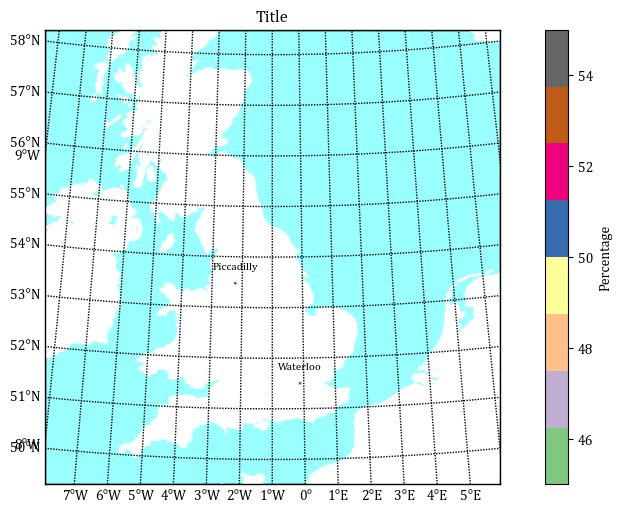

In [4]:
base_map_plot(sdata=1,lat=df_post['lat'],lon=df_post['long'],area=df_post['pct'],label=df_post['place'],bar=True,
              title="Title")

# Load and use shape files

In [5]:
##### postcode lookup for shape files #########################################
postcode_lookup = "pcd_oa_lsoa_msoa_ltla_utla_rgn_ctry_ew_may_2021_lu_v2.csv"
df_postcode_lookup = pd.read_csv(f'{folder}/{postcode_lookup}',encoding='utf-8')

# select relevant columns
df_postcode_lookup = df_postcode_lookup[["pcd","rgn22cd","rgn22nm", "msoa21nm", "lsoa21nm"]]

# join the data together, regions to postcodes
df_post1 = pd.merge(df_post,df_postcode_lookup, how="left", left_on="postcode", right_on="pcd")

# Regions map

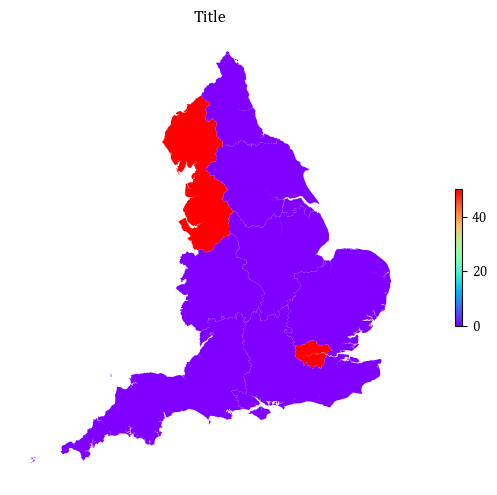

In [6]:
read_display_map(regions,"rgn22nm","RGN24NM")

# MSOA map

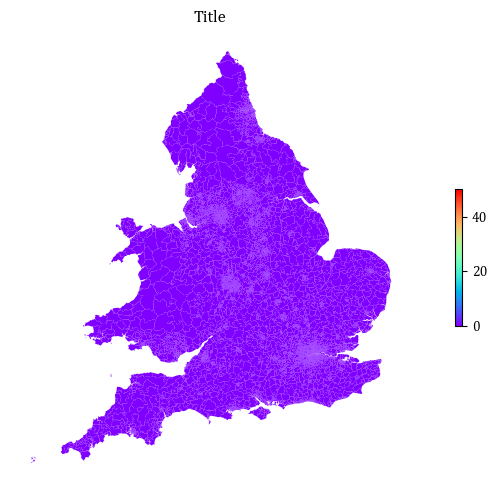

In [7]:
read_display_map(msoa,"msoa21nm","MSOA21NM")

# LSOA map

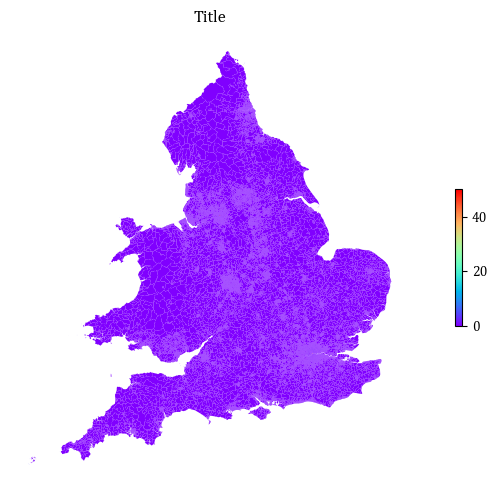

In [8]:
read_display_map(lsoa,"lsoa21nm","LSOA21NM")